**SNMPTN Prediction - Universitas Negeri Semarang - FMIPA**

# Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# split train set dan test set
from sklearn.model_selection import train_test_split

# standardization
from sklearn.preprocessing import StandardScaler

# mencari model dengan setting-an hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

# model Decision Tree
from sklearn.tree import DecisionTreeClassifier

# menilai performa model
from sklearn.metrics import classification_report

# visualisasi untuk model Decision Tree
from sklearn import tree

# save model untuk deploy
import joblib
import pickle

# library untuk mengabaikan pesan warning
import warnings
warnings.filterwarnings("ignore")

# 1. Load Dataset

Pertama, load dataset SNMPTN yang telah disediakan.
Download dataset di [sini](https://drive.google.com/file/d/1mu6t3mwF-MJO_1N3JS4MHVyrAtT19Lsr/view?usp=share_link).

In [ ]:
df = pd.read_csv('/content/Data SNMPTN Fix.csv')
df.head()

,Program_Studi,Status,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika
0,Fisika,Tidak Lolos,88,77,88,78,78,88
1,Fisika,Tidak Lolos,89,75,85,89,78,85
2,Fisika,Tidak Lolos,88,86,88,85,76,79
3,Fisika,Tidak Lolos,85,82,85,88,79,82
4,Fisika,Tidak Lolos,77,81,79,89,75,92



Analisis tiap kolom yang ada di dalam dataset, kemudian tentukan feature dan label.

Karena kita ingin memprediksi kelolosan SNMPTN dengan nilai rata-rata rapot calon mahasiswa, maka kita pilih kolom **Status** sebagai label. Sementara, kolom sisanya menjadi feature.

Selanjutnya, pindahkan label (kolom Status) ke posisi ujung sebelah kanan table, untuk memudahkan kita pada proses selanjutnya.


In [ ]:
temporary = df['Status']
df.drop(labels=['Status'], axis=1, inplace = True)
df['Status'] = temporary # pindahkan label ke posisi ujung sebelah kanan
df.head()

,Program_Studi,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika,Status
0,Fisika,88,77,88,78,78,88,Tidak Lolos
1,Fisika,89,75,85,89,78,85,Tidak Lolos
2,Fisika,88,86,88,85,76,79,Tidak Lolos
3,Fisika,85,82,85,88,79,82,Tidak Lolos
4,Fisika,77,81,79,89,75,92,Tidak Lolos


In [ ]:
# ukuran dataset yang kita miliki
df.shape

(130, 8)

Pastikan tidak ada missing dan duplicate value dalam dataset sebelum kita ke tahap berikutnya.



In [ ]:
# periksa missing value
df.isnull().sum()

Program_Studi       0
Bahasa_Indonesia    0
Bahasa_Inggris      0
Biologi             0
Fisika              0
Kimia               0
Matematika          0
Status              0
dtype: int64

In [ ]:
# periksa duplicate value
df.duplicated().sum()

0

In [ ]:
# hapus data duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(130, 8)

Jika ditemukan missing dan duplicate value, maka kita harus melakukan *data preprocessing* terlebih dahulu.

Kabar baiknya, dataset kita tidak memiliki missing ataupun duplicate value sehingga kita bisa ke tahap berikutnya.

# 2. Data Preparation

Dalam dataset kita, masih terdapat kolom yang memiliki nilai kategorik, yakni kolom: 
- Program_Studi
- Bahasa_Indonesia
- Bahasa_Inggris
- Biologi
- Fisika
- Kimia
- Matematika, dan
- Status

Sayangnya, library Machine Learning hanya bisa memproses data numerik. Supaya dataset kita bisa diproses library Machine Learning, kita perlu mengubah kolom bernilai kategorik menjadi numerik.


Salah satu metode yang bisa kita gunakan untuk mengubah nilai suatu kolom adalah Label Encoding.

In [ ]:
df.head()

,Program_Studi,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika,Status
0,Fisika,88,77,88,78,78,88,Tidak Lolos
1,Fisika,89,75,85,89,78,85,Tidak Lolos
2,Fisika,88,86,88,85,76,79,Tidak Lolos
3,Fisika,85,82,85,88,79,82,Tidak Lolos
4,Fisika,77,81,79,89,75,92,Tidak Lolos


In [ ]:
# # label encoding kolom kecelakaan_kerja
# df['sekolah'] = df['sekolah'].map({'SMA':0, 'SMK':1})

# # label encoding kolom promosi
# df['prodi'] = df['prodi'].map({'Sistem Informasi':0, 'Teknik Komputer':1})

# label encoding kolom divisi
df['Program_Studi'] = df['Program_Studi'].map({'Fisika':0,
                               'Pendidikan Fisika':1,
                               'Pendidikan Biologi':2,
                               'Biologi':3,
                               'Farmasi':4,
                               'Sistem Informasi':5,
                               'Kimia':6,
                               'Pendidikan Kimia':7,
                               'Pendidikan Matematika':8,
                               'Matematika':9,
                               'Pendidikan IPA':10,
                               'Ilmu Lingkungan':11,
                               'Teknik Informatika':12})

# # label encoding kolom gaji
# df['gaji'] = df['gaji'].map({'low':0, 'medium':1, 'high':2})

# label encoding kolom resign
df['Status'] = df['Status'].map({'Lolos':0, 'Tidak Lolos':1})

In [ ]:
df.head(15)

,Program_Studi,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika,Status
0,0,88,77,88,78,78,88,1
1,0,89,75,85,89,78,85,1
2,0,88,86,88,85,76,79,1
3,0,85,82,85,88,79,82,1
4,0,77,81,79,89,75,92,1
5,0,75,80,88,85,90,88,0
6,0,90,90,86,87,85,86,0
7,0,87,88,89,85,88,85,0
8,0,90,90,88,87,88,89,0
9,0,87,89,88,85,88,90,0


Dataset kita memiliki 130 baris (observasi) dan 8 buah feature dan. Feature yang terlalu banyak dan observasi yang terlalu sedikit dapat menyebabkan performa model menurun.

Solusi masalah ini adalah dengan mereduksi feature dalam dataset, atau biasa disebut dengan *Dimensionality Reduction*.

Salah satu metode *dimensionality reductio*n adalah dengan memilih feature yang paling berkorelasi dengan label menggunakan heatmap. Kita akan memilih 5 feature berdasarkan label resign.

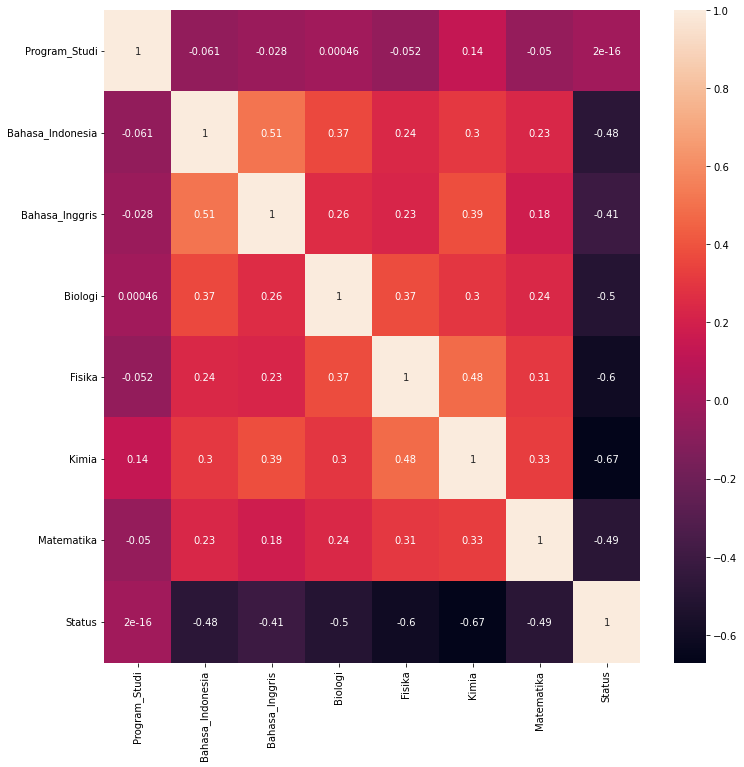

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Tujuh feature dengan nilai korelasi terbesar, **baik positif atau negatif**, terhadap label Status adalah:

1. Program_Studi (2e-16)
2. Bahasa_Indonesia (-0.48)
3. Bahasa_Inggris (-0.41)
4. Biologi (-0.5)
5. Fisika (-0.6)
6. Kimia (-0.67)
7. Matematika (-0.49)

Selanjutnya, kita hanya menggunakan 7 feature ini pada tahap modeling.


Pisahkan feature dan label. Simpan nilai feature ke dalam variable **X** dan nilai label ke dalam variable **y**.

In [ ]:
df.head()

,Program_Studi,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika,Status
0,0,88,77,88,78,78,88,1
1,0,89,75,85,89,78,85,1
2,0,88,86,88,85,76,79,1
3,0,85,82,85,88,79,82,1
4,0,77,81,79,89,75,92,1


In [ ]:
nama_feature = ['Program_Studi', 'Bahasa_Indonesia',	'Bahasa_Inggris',	'Biologi', 'Fisika',	'Kimia',	'Matematika']

X = df[nama_feature].values
y = df['Status'].values

Pisahkan dataset menjadi training set (80%) dan test set (20%) menggunakan **[traintestsplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Modeling

In [ ]:
# jumlah observasi pada tiap label
df.Status.value_counts()

1    65
0    65
Name: Status, dtype: int64

In [ ]:
df.head()

,Program_Studi,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika,Status
0,0,88,77,88,78,78,88,1
1,0,89,75,85,89,78,85,1
2,0,88,86,88,85,76,79,1
3,0,85,82,85,88,79,82,1
4,0,77,81,79,89,75,92,1


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# hasil scale 5 baris teratas
print(X_train_scaled[:5, :])

[[ 1.02608159 -1.86094544 -2.26839242 -1.77349215 -1.24300175 -0.87538421
  -1.42971399]
 [-1.08703693  0.13887653  0.73833949 -0.01897911 -0.10903524  0.61707412
  -0.78135532]
 [-1.35117675 -1.41654056  0.04447828 -1.99280628  0.79813797 -1.30180088
   0.29924246]
 [-0.82289712  0.58328141  0.27576535 -1.99280628 -1.46979505  0.61707412
   0.94760113]
 [-0.29461749  0.58328141  0.50705242  0.41964915 -0.56262185 -0.23575921
  -0.56523576]]


In [ ]:
# model Decision Tree
test_model = DecisionTreeClassifier(random_state=42)

# hyperparameter
params = {'max_depth': list(range(2, 10)),
          'max_leaf_nodes': list(range(2, 10))}

search_best_model = GridSearchCV(test_model, params, cv=20)

# training model
search_best_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
# model dengan hyperparameter terbaik
search_best_model.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)

# 4. Evaluation

Setelah mendapat model Decision Tree terbaik, langkah berikutnya adalah melakukan re-modeling dan mengevaluasi performa model menggunakan [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [ ]:
# melakukan re-modeling (menyimpan model terbaik dalam variable model)
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=42)

In [ ]:
# mengevaluasi model
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.85      0.85      0.85        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



Hasil evaluasi model menunjukkan bahwa model kita memiliki:
- precision 85%
- recall 85%
- accuracy 85%

Berdasarkan hasil evaluasi, model kita telah siap untuk dideploy karena sudah memiliki performa yang baik.

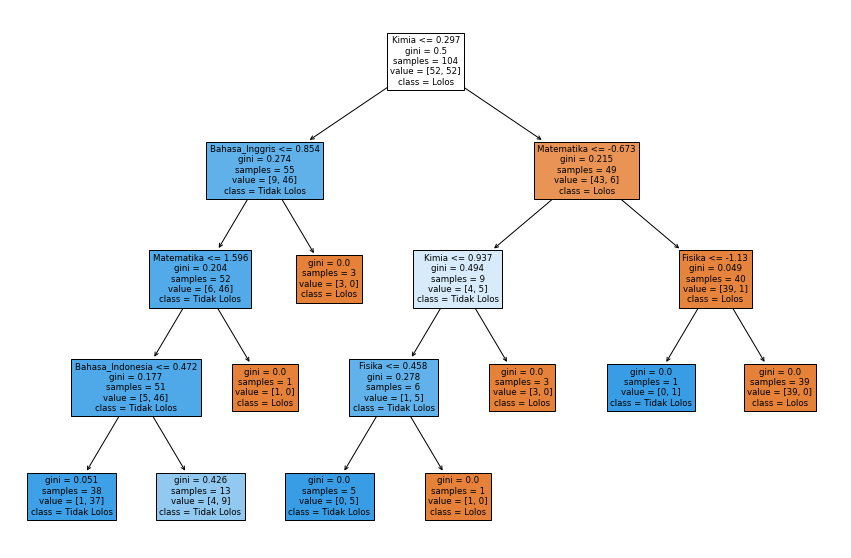

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,
               feature_names = nama_feature,
               class_names = ['Lolos', 'Tidak Lolos'],
               filled = True)
plt.show()

In [ ]:
df.head()

,Program_Studi,Bahasa_Indonesia,Bahasa_Inggris,Biologi,Fisika,Kimia,Matematika,Status
0,0,88,77,88,78,78,88,1
1,0,89,75,85,89,78,85,1
2,0,88,86,88,85,76,79,1
3,0,85,82,85,88,79,82,1
4,0,77,81,79,89,75,92,1


Lakukan prediksi data baru menggunakan model tersebut.

In [ ]:
Program_Studi = 3 #@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]{type:"raw"}
Bahasa_Indonesia = 90#@param {type:"number"}
Bahasa_Inggris = 89#@param {type:"number"}
Biologi = 88#@param {type:"number"}
Fisika = 92#@param {type:"number"}
Kimia = 87#@param {type:"number"}
Matematika = 90#@param {type:"number"}

# data baru yang diinput harus di-standardization terlebih dahulu
data_baru = [[Program_Studi, Bahasa_Indonesia,	Bahasa_Inggris, Biologi, Fisika, Kimia, Matematika]]
data_baru = scaler.transform(data_baru)

# prediksi data baru, yang sudah di-standardization, menggunakan model Decision Tree terbaik
hasil_prediksi = model.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# hasil prediksi
print(f'Nilai tersebut diprediksi ', end='')
if hasil_prediksi == 0:
  print('lolos!')
elif hasil_prediksi == 1:
  print('tidak lolos!')

Nilai tersebut diprediksi lolos!


# Save Model

Langkah terakhir adalah men-save model dan scaler object (standardization function) dalam file pickle.

Kita membutuhkan file-file pickle ini pada tahap deployment.

In [ ]:
pickle.dump(scaler, open('scaler_ds.pkl', 'wb'))
pickle.dump(model, open('model_ds.pkl', 'wb'))